<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/homework-1/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import math
#from google.colab import drive
#drive.mount('/content/drive')

w0, w1, w2 = 1, 0, 1
v0,v1,v2 = 0,0,0
best_w0, best_w1, best_w2 = w0, w1, w2

temp0,temp1,temp2 = 1,0,1

x1, x2, y = [], [], []
x1_test,x2_test,y_test = [],[],[]

In [135]:
def file_read(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(float(values[2]))
    return x1,x2,y

def file_read_test(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1_test.append(float(values[0]))
            x2_test.append(float(values[1]))
            y_test.append(float(values[2]))
    return x1_test,x2_test,y_test


In [136]:
def misclassified_points():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

# def PLA(n):

#     global w0, w1, w2
#     for i in range(1000):
#         misclassified = misclassified_points()
#         if not misclassified:
#             break
#         x1_misclassified, x2_misclassified, y_misclassified = misclassified[0]
#         signal = w0+ w1*x1_misclassified+ w2*x2_misclassified
#         if y_misclassified*signal <= 1:
#           w0 += n*(y_misclassified - signal)
#           w1 += n*(y_misclassified - signal) * x1_misclassified
#           w2 += n*(y_misclassified - signal) * x2_misclassified
#           #print(w0,w1,w2)

def PLA(eta, max_iterations=1000, weight_limit=1e30):
    global w0, w1, w2
    for iteration in range(max_iterations):
        misclassified = misclassified_points()
        if not misclassified:
            break

        max_weight_update = 0  # Initialize a variable to track the maximum weight update

        for x1_misclassified, x2_misclassified, y_misclassified in misclassified:
            signal = w0 + w1 * x1_misclassified + w2 * x2_misclassified
            if y_misclassified * signal <= 1:
                w0 += eta * (y_misclassified - signal)
                w1 += eta * (y_misclassified - signal) * x1_misclassified
                w2 += eta * (y_misclassified - signal) * x2_misclassified

                # Calculate the weight update for this point
                weight_update = eta * (y_misclassified - signal) * (x1_misclassified ** 2 + x2_misclassified ** 2)
                max_weight_update = max(max_weight_update, weight_update)

        # Check for convergence based on the maximum weight update
        if max_weight_update < 1e-30:
            print("Converged. Terminating training.")
            break

        # Check for numerical stability of weights
        if abs(w0) > weight_limit or abs(w1) > weight_limit or abs(w2) > weight_limit:
            print("Weights are getting too large. Terminating training.")
            break





In [137]:
def calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2):
    num_samples = len(x1_test)
    misclassified = 0

    for i in range(num_samples):
        x1_sample, x2_sample = x1_test[i], x2_test[i]
        signal = w0 + w1 * x1_sample + w2 * x2_sample

        # Predict the label based on the sign of the signal
        predicted_label = 1 if signal >= 0 else -1

        if predicted_label != y_test[i]:
            misclassified += 1

    error_percentage = (misclassified / num_samples) * 100.0
    return error_percentage

# Assuming you have the weights w0, w1, and w2 from your PLA
# Calculate the error percentage




Converged. Terminating training.
Weights obtained for n = 1 --> w0:  -2.3180921413469253    w1: 15.684929814407257    w2:  -3.3735511757743737
Error Percentage on Test Data: 30.76%


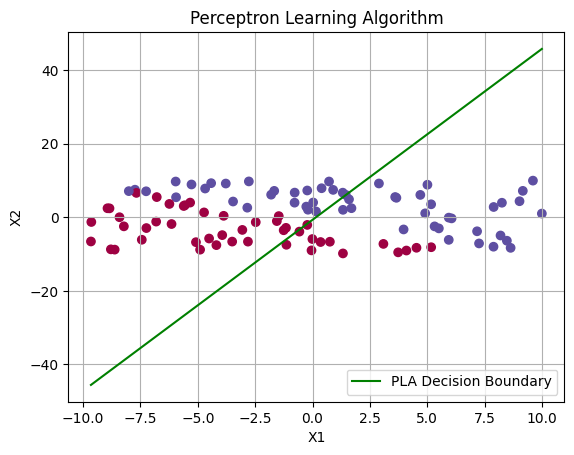

In [138]:
file_read('synthetic_dataset.csv')
file_read_test('synthetic_dataset_test.csv')
PLA(1)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 1 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()





Converged. Terminating training.
Weights obtained from n = 0.01 --> w0:  0.887301053645754    w1: 0.7501232974639989    w2:  0.5579081104810829
Error Percentage on Test Data: 6.98%


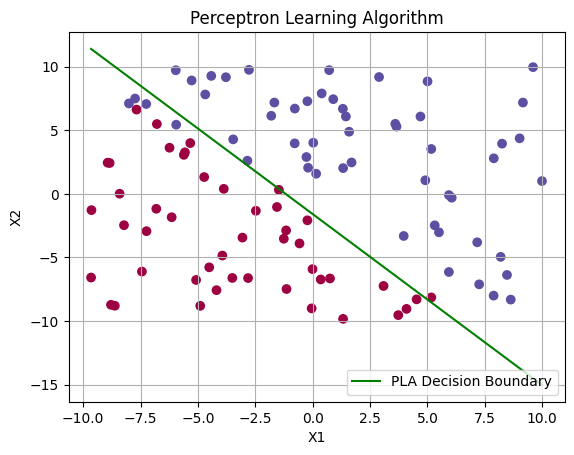

In [139]:
w0, w1, w2 = 1, 0, 1
PLA(0.01)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from n = 0.01 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()


Converged. Terminating training.
Weights obtained for n = 0.0001 --> w0:  0.9847511161755389    w1: 0.5111657003440097    w2:  0.6134107334352085
Error Percentage on Test Data: 4.91%


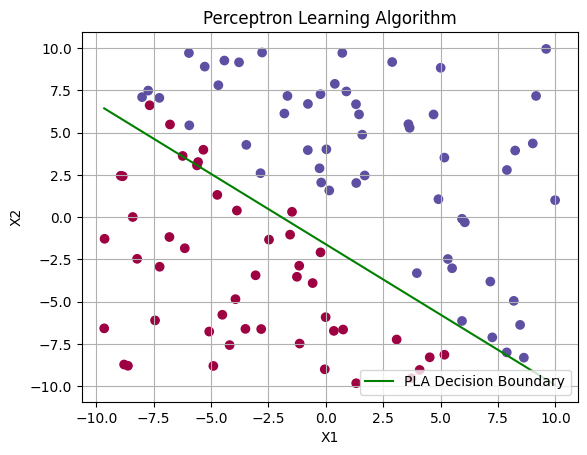

In [140]:
w0, w1, w2 = 1, 0, 1
PLA(0.0001)
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 0.0001 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calculate_error_percentage(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()